In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, make_scorer, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

pd.set_option('display.max_columns' ,  None)
pd.set_option('display.max_rows' ,  None)
pd.options.display.float_format = '{:.3f}'.format


In [2]:
voitures = pd.read_csv('voitures_preprocessed.csv')

In [3]:
voitures.head()

,Brand,Model,Kilométrage,Année,Boîte,Carburant,Puissance fiscale,Prix
0,Mercedes-Benz,CLASSE C AMG,34800,2021,Automatique,Hybride,10,205000
1,KIA,RIO 5P,99000,2018,Manuelle,Essence,5,50000
2,Volvo,XC60 R,165000,2011,Automatique,Essence,13,44500
3,Volkswagen,POLO,63000,2022,Manuelle,Essence,4,53000
4,Volkswagen,GOLF 8,14200,2024,Automatique,Hybride,8,146000


In [4]:
voitures.describe()

,Kilométrage,Année,Puissance fiscale,Prix
count,2136.000,2136.000,2136.000,2136.000
mean,118039.096,2017.502,8.682,97688.296
std,83961.352,4.778,4.785,74248.982
min,0.000,1985.000,4.000,12000.000
25%,60000.000,2015.000,6.000,49975.000
50%,102000.000,2019.000,7.000,76000.000
75%,162050.000,2021.000,10.000,119000.000
max,999999.000,2025.000,48.000,620000.000


In [5]:
voitures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2136 entries, 0 to 2135
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Brand              2127 non-null   object
 1   Model              2136 non-null   object
 2   Kilométrage        2136 non-null   int64 
 3   Année              2136 non-null   int64 
 4   Boîte              2136 non-null   object
 5   Carburant          2136 non-null   object
 6   Puissance fiscale  2136 non-null   int64 
 7   Prix               2136 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 133.6+ KB


#### Taking out 10 cars for later test 

In [7]:
import pandas as pd

# Define the test vehicles you want to extract
test_vehicles = [
    ('KIA', 'SPORTAGE'),
    ('Renault', 'MEGANE'),
    ('Seat', 'Seat_LEON'),
    ('Toyota', 'LAND CRUISER'),
    ('Volkswagen', 'GOLF 7'),
    ('Peugeot', '206'),
    ('Mercedes-Benz', 'CLASSE A'),
    ('BMW', 'SÉRIE 3'),
    ('Fiat', 'FIORINO')
]

# Initialize an empty DataFrame for test vehicles
test_voitures = pd.DataFrame()

# Iterate through each brand-model pair and extract one example
for brand, model in test_vehicles:
    # Find the first occurrence of this brand-model combination
    match = voitures[(voitures['Brand'] == brand) & (voitures['Model'] == model)].head(1)
    
    # Add to test_voitures if found
    if not match.empty:
        test_voitures = pd.concat([test_voitures, match])
        
        # Remove from original dataframe using index
        voitures = voitures.drop(match.index)

# Verify the results
print(f"Test vehicles extracted: {len(test_voitures)}")
print(f"Remaining vehicles: {len(voitures)}")

# Display the test vehicles
print("\nTest vehicles:")
print(test_voitures[['Brand', 'Model']])

Test vehicles extracted: 8
Remaining vehicles: 2128

Test vehicles:
             Brand         Model
25             KIA      SPORTAGE
235        Renault        MEGANE
78            Seat     Seat_LEON
825         Toyota  LAND CRUISER
112     Volkswagen        GOLF 7
346  Mercedes-Benz      CLASSE A
61             BMW       SÉRIE 3
237           Fiat       FIORINO


In [8]:
test_voitures

,Brand,Model,Kilométrage,Année,Boîte,Carburant,Puissance fiscale,Prix
25,KIA,SPORTAGE,56000,2022,Automatique,Essence,10,120000
235,Renault,MEGANE,125000,2020,Manuelle,Diesel,5,64500
78,Seat,Seat_LEON,170000,2019,Manuelle,Essence,6,60000
825,Toyota,LAND CRUISER,506000,1996,Manuelle,Diesel,17,72000
112,Volkswagen,GOLF 7,200000,2020,Automatique,Essence,6,60000
346,Mercedes-Benz,CLASSE A,50000,2019,Automatique,Diesel,6,98000
61,BMW,SÉRIE 3,155000,2017,Automatique,Essence,7,77000
237,Fiat,FIORINO,120000,2021,Manuelle,Diesel,5,35000


# Visualisation

### 1. Visualisation des types de boîte de vitesse (colonne "Boîte")


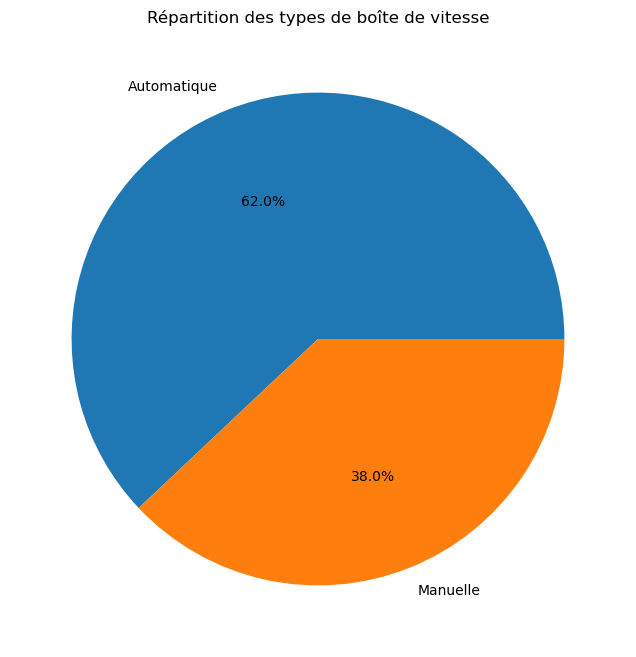

In [11]:
plt.figure(figsize=(8, 8))
voitures['Boîte'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Répartition des types de boîte de vitesse')
plt.ylabel('')  # Enlève le label y inutile
plt.show()

### 2. Visualisation des types de carburant (colonne "Carburant")

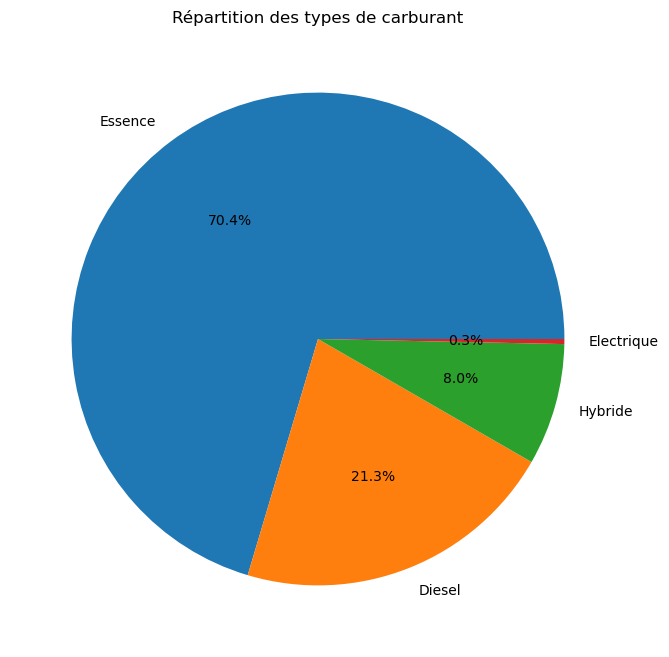

In [13]:
# Camembert
plt.figure(figsize=(8, 8))
voitures['Carburant'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Répartition des types de carburant')
plt.ylabel('')
plt.show()

### 3. Visualisation des puissances fiscales (colonne "Puissance fiscale")

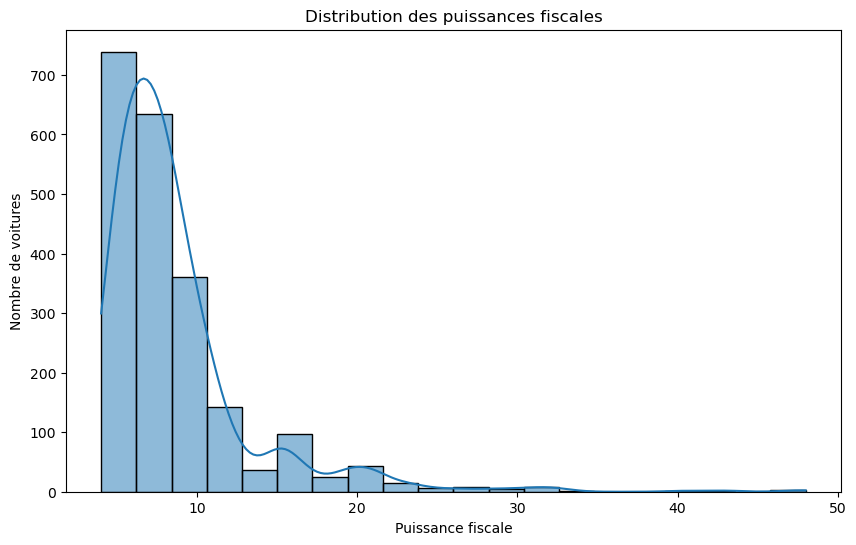

In [15]:
# Histogramme pour la puissance fiscale
plt.figure(figsize=(10, 6))
sns.histplot(data=voitures, x='Puissance fiscale', bins=20, kde=True)
plt.title('Distribution des puissances fiscales')
plt.xlabel('Puissance fiscale')
plt.ylabel('Nombre de voitures')
plt.show()

## Check Outliers

### Prix

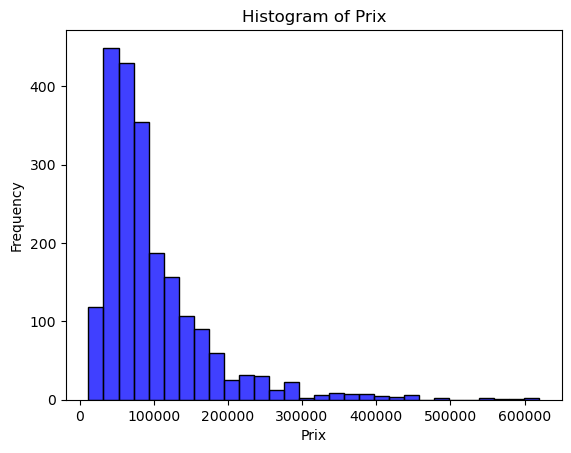

In [18]:
# Plot the histogram for the 'Prix' column
sns.histplot(voitures['Prix'], bins=30, kde=False, color='blue', edgecolor='black')  # Adjust bins as needed
plt.title('Histogram of Prix')
plt.xlabel('Prix')
plt.ylabel('Frequency')
plt.show()

In [19]:
voitures = voitures[voitures['Prix'] < voitures['Prix'].quantile(0.99)]

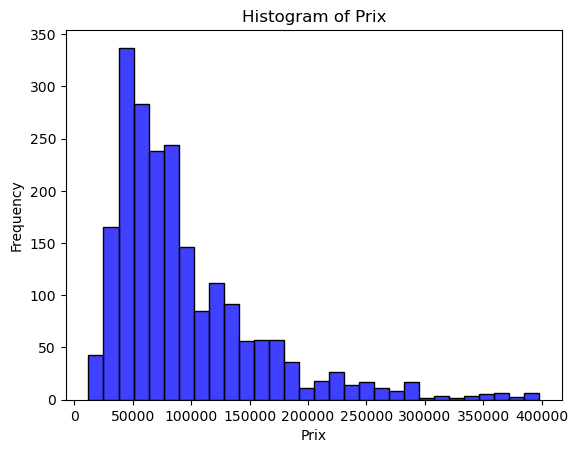

In [20]:
# Plot the histogram for the 'Prix' column
sns.histplot(voitures['Prix'], bins=30, kde=False, color='blue', edgecolor='black')  # Adjust bins as needed
plt.title('Histogram of Prix')
plt.xlabel('Prix')
plt.ylabel('Frequency')
plt.show()

### Kilometrage

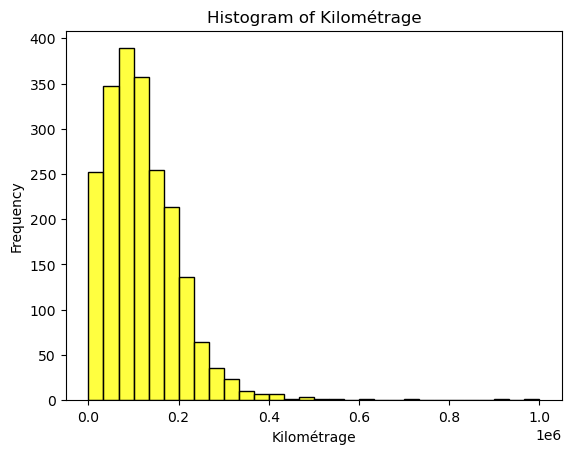

In [22]:
# Plot the histogram for the 'Prix' column
sns.histplot(voitures['Kilométrage'], bins=30, kde=False, color='yellow', edgecolor='black')  # Adjust bins as needed
plt.title('Histogram of Kilométrage')
plt.xlabel('Kilométrage')
plt.ylabel('Frequency')
plt.show()

In [23]:
voitures = voitures[voitures['Kilométrage'] < voitures['Kilométrage'].quantile(0.99)]

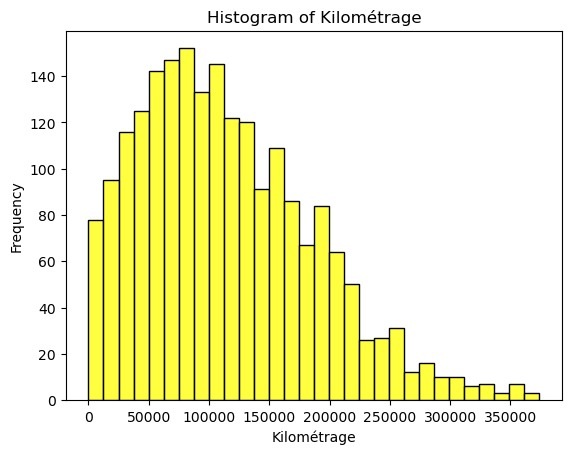

In [24]:
# Plot the histogram for the 'Prix' column
sns.histplot(voitures['Kilométrage'], bins=30, kde=False, color='yellow', edgecolor='black')  # Adjust bins as needed
plt.title('Histogram of Kilométrage')
plt.xlabel('Kilométrage')
plt.ylabel('Frequency')
plt.show()

## Splitting Features and Target

In [26]:
X = voitures.drop(columns=['Prix'] , axis=1)
y = voitures['Prix']

## One-Hot Encoding categorical features

In [28]:
X = pd.get_dummies(X , drop_first=True)

In [29]:
X.head()

,Kilométrage,Année,Puissance fiscale,Brand_Audi,Brand_BAIC YX,Brand_BMW,Brand_BYD,Brand_Chery,Brand_Chevrolet,Brand_Citroën,Brand_Cupra,Brand_DFSK,Brand_DS,Brand_Dacia,Brand_Dodge,Brand_Dongfeng,Brand_Fiat,Brand_Ford,Brand_Foton,Brand_GMC,Brand_Geely,Brand_Great Wall,Brand_Haval,Brand_Honda,Brand_Hyundai,Brand_Infiniti,Brand_Isuzu,Brand_Iveco,Brand_Jaguar,Brand_Jeep,Brand_KIA,Brand_Lada,Brand_Land Rover,Brand_MG,Brand_Mahindra,Brand_Mazda,Brand_Mercedes-Benz,Brand_Mini,Brand_Mitsubishi,Brand_Nissan,Brand_Opel,Brand_Peugeot,Brand_Porsche,Brand_Renault,Brand_Seat,Brand_Skoda,Brand_Smart,Brand_Ssangyong,Brand_Suzuki,Brand_Toyota,Brand_Volkswagen,Brand_Volvo,Brand_Wallyscar,Brand_ZXAUTO,Model_2008,Model_2008 ACTIVE PACK,Model_2008 ACTIVE PM + TOIT,Model_2008 ALLURE,Model_2008 ALLURE BLANC NACRÉ,Model_2008 ALLURE BLANC NACRÉ + TOIT,Model_206 BERLINE,Model_206 LOOK,Model_206+,Model_206+ POPULAIRE,Model_207,Model_208,Model_208 ACTIVE,Model_208 ALLURE,Model_208 PACK EDITION,Model_208 VRAIE GT,Model_3 CORE+ GRADE,Model_3 PORTES,Model_3 PORTES CLASSIC,Model_3 PORTES INTACTE,Model_3 PROPRE,Model_3 SEDAN CORE+ GRADE,Model_3008,Model_3008 ALLURE,Model_3008 GT,Model_3008 GT-LINE,Model_3008 IMPECCABLE,Model_3008 PREMIUM BLANC NACRÉ,Model_301 ALLURE,Model_301 ALLURE VISIO,Model_307,Model_307 PHASE 2,Model_308,Model_308 ALLURE,Model_4 CROSSBACK,Model_4008,Model_4008 LUXE,Model_407,Model_408,Model_4X4,Model_5 PORTES,Model_5 PORTES PACK CHILI,Model_500,Model_500 DOLCEVITA,Model_500 POP,Model_5008,Model_500X,Model_504,Model_508,Model_508 ALLURE,Model_7 CROSSBACK,Model_719 ATMOS,Model_A1 SPORTBACK,Model_A3,Model_A3 BERLINE,Model_A3 BERLINE BUSINESS,Model_A3 SPORTBACK,Model_A3 SPORTBACK S-LINE,Model_A3 SPORTBACK SPORT,Model_A4,Model_A4 AMBIENTE,Model_A4 AMBITION LUXE,Model_A4 BUSINESS,Model_A4 BUSINESS PLUS,Model_A5,Model_A5 CABRIOLET,Model_A5 COUPÉ,Model_A5 SPORTBACK,Model_A5 SPORTBACK S-LINE SELECTION,Model_A6,Model_A6 S-LINE,Model_A7 SPORTBACK QUATTRO V6,Model_ACADIA AWD,Model_ACCENT,Model_ACCENT GLS,Model_ACCORD,Model_ACTYON SPORTS,Model_ACTYON SPORTS 4*4,Model_AGYA,Model_AGYA BVA,Model_AGYA COMFORT,Model_AMAROK,Model_AMAROK DOUBLE CABINE,Model_ARKANA INTENSE,Model_ARONA,Model_ASTRA EDITION PLUS,Model_ASTRA ELEGANCE,Model_ASX 4WD,Model_ATECA FR,Model_ATECA STYLE,Model_ATTRAGE,Model_ATTRAGE GLS,Model_AUSTRAL,Model_AX4,Model_BALENO,Model_BERLINGO,Model_BERLINGO BVA 5 PLACES,Model_BERLINGO MULTISPACE,Model_BERLINGO VAN BVA TOUTE OPTIONS,Model_BOXER,Model_BT-50,Model_C-HR,Model_C1,Model_C1 GRIS ANTHRACITE,Model_C2,Model_C3,Model_C3 C-SÉRIES ÉDITION SPECIAL,Model_C3 SHINE,Model_C4,Model_C4 CACTUS,Model_C5,Model_CADDY,Model_CALIBRA TURBO 4X4,Model_CAPTAIN E,Model_CAPTIVA 5 PLACES,Model_CAPTIVA 7 PLACES,Model_CAPTUR,Model_CAPTUR ZEN,Model_CARENS,Model_CAYENNE,Model_CAYENNE COUPÉ,Model_CAYENNE PLATINIUM ÉDITION,Model_CAYENNE S DIESEL,Model_CAYENNE V6,Model_CEE'D,Model_CELERIO,Model_CERATO,Model_CHANGAN HUNTER,Model_CHANGAN STAR TRUCK DOUBLE CABINE,Model_CHANGAN UNI-T,Model_CHEROKEE LIMITED,Model_CIAZ,Model_CITY,Model_CIVIC,Model_CIVIC RS,Model_CIVIC TYPE R RS,Model_CLA,Model_CLA 200 KIT AMG,Model_CLA 250 E,Model_CLA 250E PACK AMG,Model_CLA AMG,Model_CLA KIT AMG,Model_CLA PACK NIGHT,Model_CLA PROGRESSIVE,Model_CLA URBAN,Model_CLASSE A,Model_CLASSE A AMG,Model_CLASSE A BERLINE,Model_CLASSE A BERLINE A 250 E KIT AMG,Model_CLASSE A BERLINE AMG,Model_CLASSE A BUSINESS,Model_CLASSE A EXECUTIVE,Model_CLASSE A URBAN,Model_CLASSE B,Model_CLASSE C,Model_CLASSE C AMG,Model_CLASSE C AMG +,Model_CLASSE C AVANTGARDE,Model_CLASSE C BUSINESS,Model_CLASSE C C180 KITT AMG,Model_CLASSE C CLASSIC EDITION C,Model_CLASSE C COUPÉ AMG,Model_CLASSE C KITT AMG,Model_CLASSE C MERCEDES C180,Model_CLASSE C PREMIUM,Model_CLASSE E,Model_CLASSE E 220 CDI AMG,Model_CLASSE E 220D KIT AMG,Model_CLASSE E AMG,Model_CLASSE E AVANTGARDE,Model_CLASSE E BUSINESS,Model_CLASSE E COUPÉ,Model_CLASSE E COUPÉ 250 CABRIOLET KIT AMG,Model_CLASSE E COUPÉ AMG,Model_CLASSE E E 200 D,Model_CLASSE E E300 

## Log Transformation for Targetlonne Model comme "KIA Rio" doit etre separer



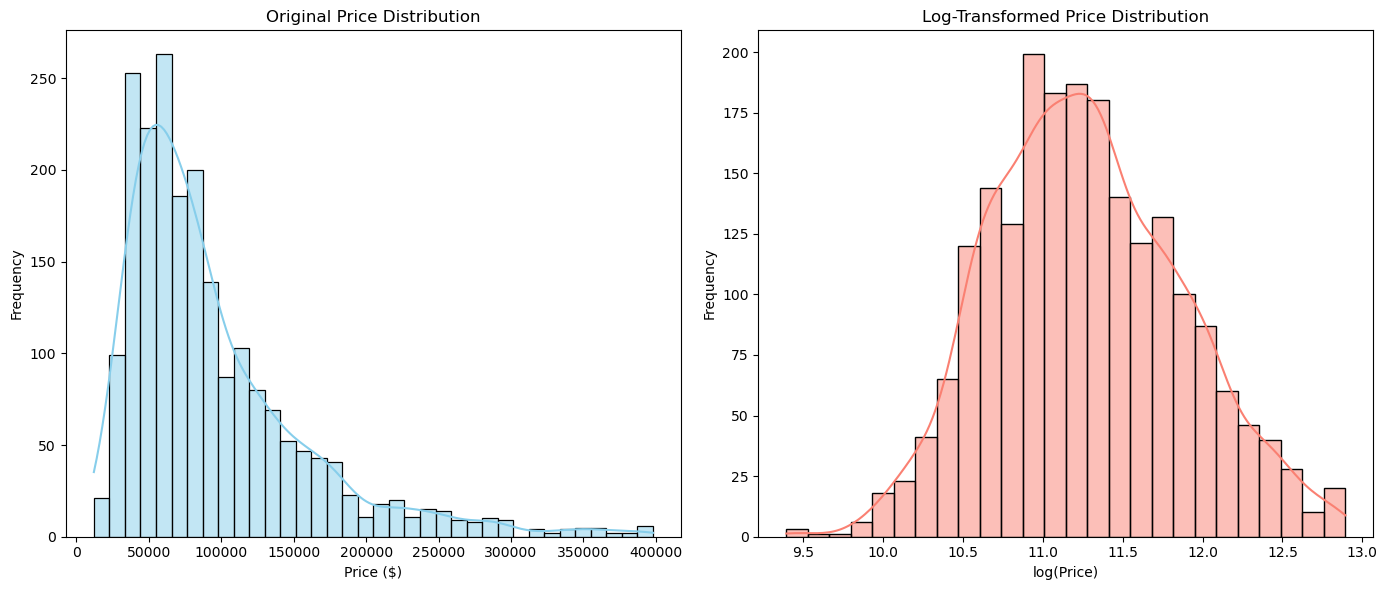

In [31]:
plt.figure(figsize=(14, 6))

# Original distribution
plt.subplot(1, 2, 1)
sns.histplot(y, kde=True, color='skyblue')
plt.title('Original Price Distribution')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')

# Log-transformed distribution
plt.subplot(1, 2, 2)
sns.histplot(np.log(y), kde=True, color='salmon')
plt.title('Log-Transformed Price Distribution')
plt.xlabel('log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [32]:
y = np.log(y)

## Model Training and Evaluation

In [34]:
# Define a custom MAE scorer that reverses the log transformation
def exp_mae(y_true, y_pred):
    # Reverse the log transformation by exponentiating
    y_true_exp = np.exp(y_true)
    y_pred_exp = np.exp(y_pred)
    # Calculate MAE on the original scale
    return mean_absolute_error(y_true_exp, y_pred_exp)

In [35]:
# Define models with STANDARDIZATION
models = {
    'Random Forest': RandomForestRegressor(random_state=42), #not affected by standardization
    'Linear Regression':LinearRegression(), #get worse with standardisation
    'K-Nearest Neighbors': make_pipeline(StandardScaler(), KNeighborsRegressor()),
}

In [36]:
cv_folds = 5
scoring = {
    'R2': make_scorer(r2_score),
    'MAE': make_scorer(exp_mae)
}

# Perform cross-validation for each model
results = {}
for name, model in models.items():
    scores = cross_validate(model, X, y, cv=cv_folds, scoring=scoring, return_train_score=False)
    results[name] = scores
    print(f"{name}:")
    print(f"  R² scores for each fold: {scores['test_R2']}")
    print(f"  Mean R²: {scores['test_R2'].mean():.3f}\n")
    print(f"  MAE scores for each fold: {scores['test_MAE']}")
    print(f"  Mean MAE: {scores['test_MAE'].mean():.3f}\n\n")

Random Forest:
  R² scores for each fold: [0.83141854 0.80737262 0.86489303 0.85298271 0.83755118]
  Mean R²: 0.839

  MAE scores for each fold: [19098.99697457 13450.05817702 16148.19260046 15783.75817144
 14412.7600767 ]
  Mean MAE: 15778.753


Linear Regression:
  R² scores for each fold: [0.81773255 0.83685048 0.85467721 0.82646515 0.85114529]
  Mean R²: 0.837

  MAE scores for each fold: [18039.69963997 11825.7551168  17368.84775682 15011.1258251
 13236.92443867]
  Mean MAE: 15096.471


K-Nearest Neighbors:
  R² scores for each fold: [0.6602197  0.49295598 0.66467806 0.57955137 0.48592384]
  Mean R²: 0.577

  MAE scores for each fold: [27063.83826975 23630.93682132 25581.52822837 25960.37815725
 24976.18369738]
  Mean MAE: 25442.573




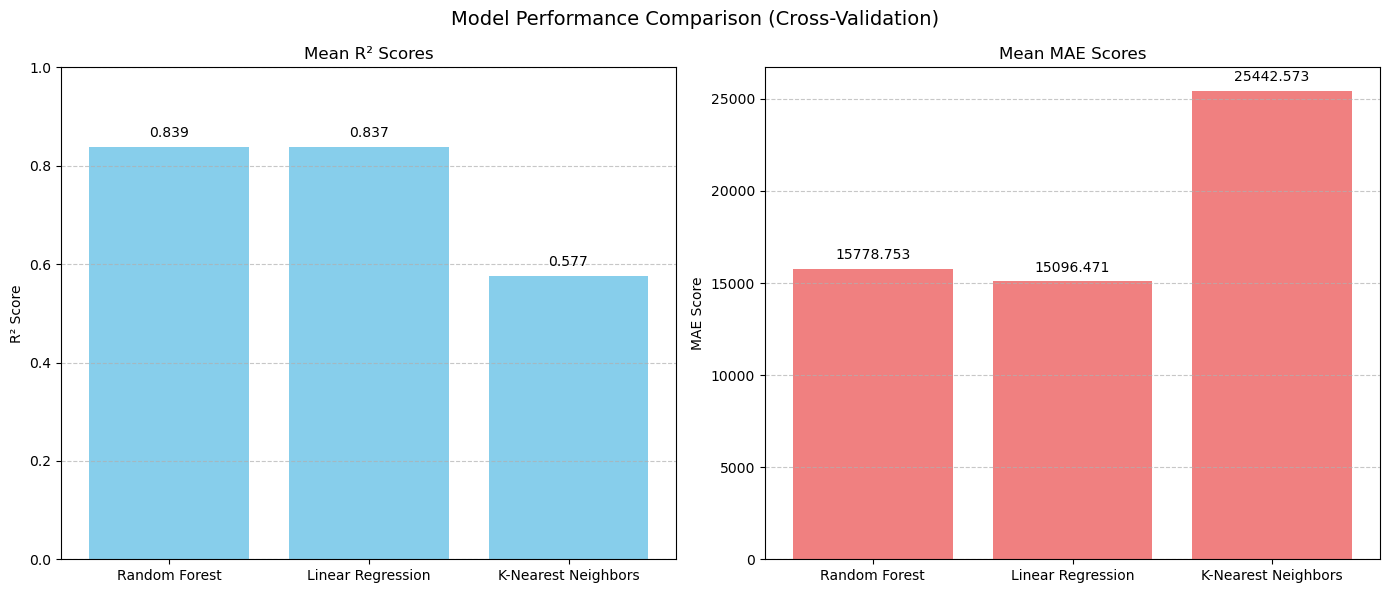

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare data for plotting
model_names = list(results.keys())
mean_r2 = [results[name]['test_R2'].mean() for name in model_names]
mean_mae = [results[name]['test_MAE'].mean() for name in model_names]

# Set up the figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Model Performance Comparison (Cross-Validation)', fontsize=14)

# R2 Score plot
ax1.bar(model_names, mean_r2, color='skyblue')
ax1.set_title('Mean R² Scores')
ax1.set_ylabel('R² Score')
ax1.set_ylim(0, 1)  # R2 typically ranges from 0 to 1
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on R2 bars
for i, v in enumerate(mean_r2):
    ax1.text(i, v + 0.02, f"{v:.3f}", ha='center')

# MAE Score plot
ax2.bar(model_names, mean_mae, color='lightcoral')
ax2.set_title('Mean MAE Scores')
ax2.set_ylabel('MAE Score')
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on MAE bars
for i, v in enumerate(mean_mae):
    ax2.text(i, v + max(mean_mae)*0.02, f"{v:.3f}", ha='center')

plt.tight_layout()
plt.show()

## Predicting on some cars

In [39]:
new_cars = test_voitures

In [40]:
X_new = new_cars.drop(columns=['Prix'])

In [41]:
# Apply the same preprocessing steps as done on the training data
X_new = pd.get_dummies(X_new, drop_first=False)

In [42]:
# Align the columns of X_new with X (training data columns)
X_new = X_new.reindex(columns=X.columns, fill_value=0)

In [43]:
#Predict the values using the trained models
for name, model in models.items():
    # Fit the model on the entire dataset (optional, if not already fitted)
    model.fit(X, y)
    
    # Predict the log-transformed prices
    y_pred_log = model.predict(X_new)

    # Reverse the log transformation to get the actual predicted prices
    y_pred = np.exp(y_pred_log)
    
    # Add the predictions to the new_cars DataFrame
    new_cars[f'Predicted Prix ({name})'] = y_pred.astype(int)

In [44]:
new_cars.head(10)

,Brand,Model,Kilométrage,Année,Boîte,Carburant,Puissance fiscale,Prix,Predicted Prix (Random Forest),Predicted Prix (Linear Regression),Predicted Prix (K-Nearest Neighbors)
25,KIA,SPORTAGE,56000,2022,Automatique,Essence,10,120000,113744,123463,121930
235,Renault,MEGANE,125000,2020,Manuelle,Diesel,5,64500,47910,58176,49960
78,Seat,Seat_LEON,170000,2019,Manuelle,Essence,6,60000,54274,58812,53565
825,Toyota,LAND CRUISER,506000,1996,Manuelle,Diesel,17,72000,72213,41927,87527
112,Volkswagen,GOLF 7,200000,2020,Automatique,Essence,6,60000,62256,75625,61158
346,Mercedes-Benz,CLASSE A,50000,2019,Automatique,Diesel,6,98000,133077,121915,75512
61,BMW,SÉRIE 3,155000,2017,Automatique,Essence,7,77000,84983,83996,79660
237,Fiat,FIORINO,120000,2021,Manuelle,Diesel,5,35000,35769,33804,43065


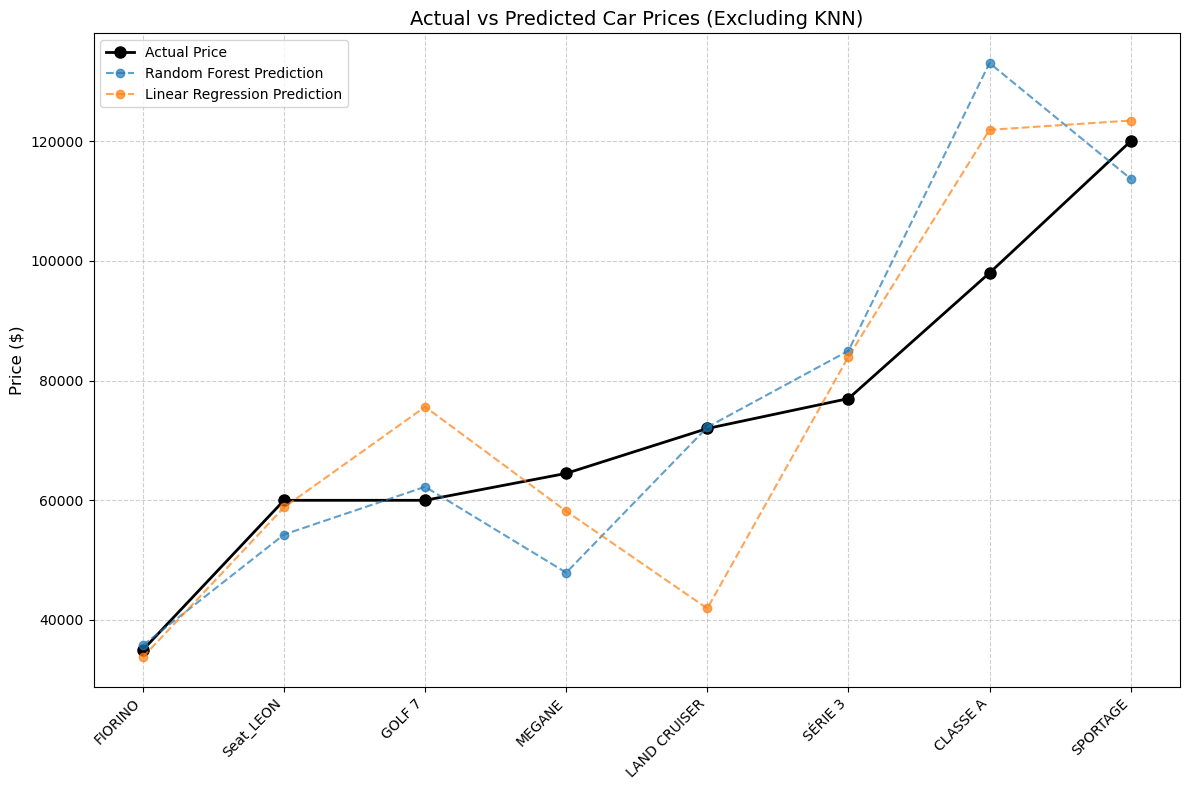

In [45]:
plt.figure(figsize=(12, 8))

# Sort by actual price for better visualization
new_cars = new_cars.sort_values('Prix')

# Plot actual prices
plt.plot(new_cars['Model'], new_cars['Prix'], 'ko-', 
        label='Actual Price', linewidth=2, markersize=8)

# Plot each model's predictions, excluding KNN
for name in models.keys():
    if name != 'K-Nearest Neighbors':  # Skip KNN model
        plt.plot(new_cars['Model'], new_cars[f'Predicted Prix ({name})'], 'o--', 
                alpha=0.7, label=f'{name} Prediction')

plt.title('Actual vs Predicted Car Prices (Excluding KNN)', fontsize=14)
plt.ylabel('Price ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Exporting Model , X_columns (dummy for reindexing) , Brand and Models , For the Interface

In [ ]:
from joblib import dump

# Get the trained Random Forest model from your dictionary
rf_model = models['Random Forest']

# Save the model to a file
dump(rf_model, './model/RandomForest')

['RandomForest']

In [ ]:
# Save the column names of X to a text file
with open('./passby/X_columns.txt', 'w', encoding='utf-8') as file:
    for column in X.columns:
        file.write(f"{column}\n")

print("X.columns saved to 'X_columns.txt'")

X.columns saved to 'X_columns.txt'


In [ ]:
# Group by 'Brand' and list the unique models for each brand
brand_models = voitures.groupby('Brand')['Model'].unique()

# Save the result to a text file
with open('./passby/brand_models.txt', 'w', encoding='utf-8') as file:
    for brand, car_models in brand_models.items():
        file.write(f"Brand: {brand}\n")
        file.write(f"Models: {', '.join(car_models)}\n")
        file.write("-" * 40 + "\n")

print("Brand and models saved to 'brand_models.txt'")

Brand and models saved to 'brand_models.txt'
